In [1]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [3]:
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [2]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
len(df)

20640

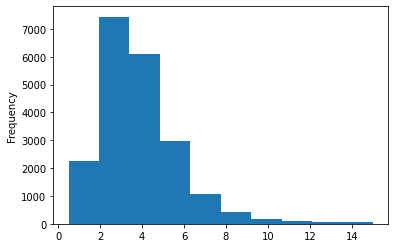

In [9]:
df['MedInc'].plot(kind='hist')

In [11]:
df['MedInc'].mean() - df['MedInc'].median()

0.3358710029070249

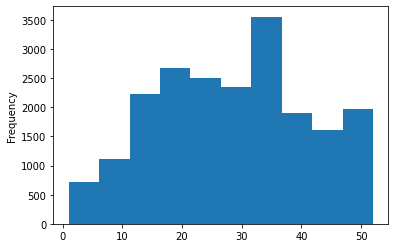

In [10]:
df['HouseAge'].plot(kind='hist')

In [12]:
(df['HouseAge'].mean() - df['HouseAge'].median()) / 5

-0.07210271317829467

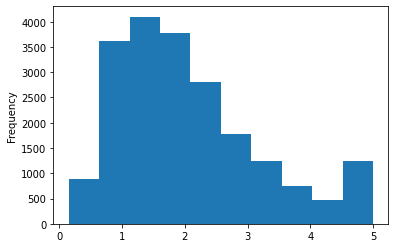

In [13]:
target.plot(kind='hist')

In [15]:
target.quantile(0.75) - target.quantile(0.25)

1.4512499999999997

In [17]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [19]:
import numpy as np

In [26]:
for col in ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']:
    print(f'{col}-target corr coeff: ', np.corrcoef(df[col], target)[0][1])

MedInc-target corr coeff:  0.6880752079585477
HouseAge-target corr coeff:  0.1056234124932099
AveRooms-target corr coeff:  0.15194828974145785
AveBedrms-target corr coeff:  -0.04670051296948685
Population-target corr coeff:  -0.024649678888894896
AveOccup-target corr coeff:  -0.023737412956134355
Latitude-target corr coeff:  -0.14416027687465924
Longitude-target corr coeff:  -0.0459666151179785


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [35]:
import pandas as pd

In [37]:
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [40]:
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [38]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [39]:
df_scaled.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [41]:
df.corr(method='spearman')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.147308,0.643671,-0.252426,0.006268,-0.044171,-0.088029,-0.009928
HouseAge,-0.147308,1.000000,-0.231409,-0.120981,-0.283879,-0.024833,0.032440,-0.150752
AveRooms,0.643671,-0.231409,1.000000,0.082046,-0.105385,0.018807,0.127134,-0.044783
AveBedrms,-0.252426,-0.120981,0.082046,1.000000,0.027027,-0.132315,0.047197,0.010884
Population,0.006268,-0.283879,-0.105385,0.027027,1.000000,0.242337,-0.123626,0.123527
AveOccup,-0.044171,-0.024833,0.018807,-0.132315,0.242337,1.000000,-0.150954,0.181468
Latitude,-0.088029,0.032440,0.127134,0.047197,-0.123626,-0.150954,1.000000,-0.879203
Longitude,-0.009928,-0.150752,-0.044783,0.010884,0.123527,0.181468,-0.879203,1.000000


In [42]:
df_scaled.corr(method='spearman')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.147308,0.643671,-0.252426,0.006268,-0.044171,-0.088029,-0.009928
HouseAge,-0.147308,1.000000,-0.231409,-0.120981,-0.283879,-0.024833,0.032440,-0.150752
AveRooms,0.643671,-0.231409,1.000000,0.082046,-0.105385,0.018807,0.127134,-0.044783
AveBedrms,-0.252426,-0.120981,0.082046,1.000000,0.027027,-0.132315,0.047197,0.010884
Population,0.006268,-0.283879,-0.105385,0.027027,1.000000,0.242337,-0.123626,0.123527
AveOccup,-0.044171,-0.024833,0.018807,-0.132315,0.242337,1.000000,-0.150954,0.181468
Latitude,-0.088029,0.032440,0.127134,0.047197,-0.123626,-0.150954,1.000000,-0.879203
Longitude,-0.009928,-0.150752,-0.044783,0.010884,0.123527,0.181468,-0.879203,1.000000


In [43]:
df.corr(method='kendall')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.099609,0.470873,-0.170677,0.003885,-0.025733,-0.059947,-0.006248
HouseAge,-0.099609,1.000000,-0.157219,-0.082004,-0.197112,-0.016475,0.026044,-0.104427
AveRooms,0.470873,-0.157219,1.000000,0.055218,-0.072516,0.018495,0.084683,-0.029806
AveBedrms,-0.170677,-0.082004,0.055218,1.000000,0.020396,-0.088062,0.031485,0.006993
Population,0.003885,-0.197112,-0.072516,0.020396,1.000000,0.164131,-0.082507,0.082974
AveOccup,-0.025733,-0.016475,0.018495,-0.088062,0.164131,1.000000,-0.102363,0.121651
Latitude,-0.059947,0.026044,0.084683,0.031485,-0.082507,-0.102363,1.000000,-0.692317
Longitude,-0.006248,-0.104427,-0.029806,0.006993,0.082974,0.121651,-0.692317,1.000000


In [44]:
df_scaled.corr(method='kendall')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.099609,0.470873,-0.170677,0.003885,-0.025733,-0.059947,-0.006248
HouseAge,-0.099609,1.000000,-0.157219,-0.082004,-0.197112,-0.016475,0.026044,-0.104427
AveRooms,0.470873,-0.157219,1.000000,0.055218,-0.072516,0.018495,0.084683,-0.029806
AveBedrms,-0.170677,-0.082004,0.055218,1.000000,0.020396,-0.088062,0.031485,0.006993
Population,0.003885,-0.197112,-0.072516,0.020396,1.000000,0.164131,-0.082507,0.082974
AveOccup,-0.025733,-0.016475,0.018495,-0.088062,0.164131,1.000000,-0.102363,0.121651
Latitude,-0.059947,0.026044,0.084683,0.031485,-0.082507,-0.102363,1.000000,-0.692317
Longitude,-0.006248,-0.104427,-0.029806,0.006993,0.082974,0.121651,-0.692317,1.000000


In [45]:
import scipy

In [47]:
print('pearsonr', scipy.stats.pearsonr(df['AveRooms'], target))
print('spearmanr', scipy.stats.spearmanr(df['AveRooms'], target))
print('kendalltau', scipy.stats.kendalltau(df['AveRooms'], target))

pearsonr (0.1519482897414577, 7.569242134618227e-107)
spearmanr SpearmanrResult(correlation=0.26336668772954447, pvalue=0.0)
kendalltau KendalltauResult(correlation=0.17917481650845044, pvalue=0.0)


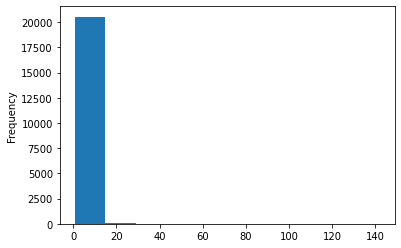

In [48]:
df['AveRooms'].plot(kind='hist')

In [49]:
df_clean = df[
    (df['AveRooms'] <= df['AveRooms'].quantile(0.975)) &
    (df['AveRooms'] >= df['AveRooms'].quantile(0.025))
]

In [51]:
target_clean = target.loc[target.index.isin(df_clean.index)]

In [52]:
print('pearsonr', scipy.stats.pearsonr(df_clean['AveRooms'], target_clean))
print('spearmanr', scipy.stats.spearmanr(df_clean['AveRooms'], target_clean))
print('kendalltau', scipy.stats.kendalltau(df_clean['AveRooms'], target_clean))

pearsonr (0.32775904644937176, 0.0)
spearmanr SpearmanrResult(correlation=0.2747934656924966, pvalue=0.0)
kendalltau KendalltauResult(correlation=0.1862786837002656, pvalue=0.0)


In [54]:
import seaborn as sns

C:\Users\maslo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [55]:
sns.heatmap()

TypeError: heatmap() missing 1 required positional argument: 'data'

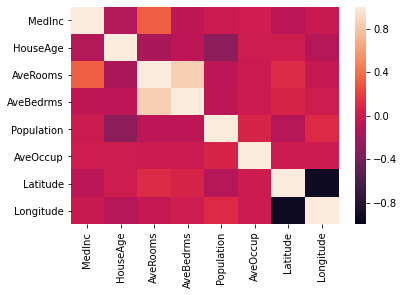

In [56]:
sns.heatmap(df.corr(), vmin=-1, vmax=1)